
### **A. Download the data and import the libraries**

---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install kaggle

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp /content/drive/MyDrive/kaggle_api/kaggle.json ~/.kaggle/kaggle.json

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d vivovinco/20222023-football-player-stats

  0% 0.00/470k [00:00<?, ?B/s]
100% 470k/470k [00:00<00:00, 120MB/s]


In [7]:
! unzip 20222023-football-player-stats.zip

Archive:  20222023-football-player-stats.zip
  inflating: 2022-2023 Football Player Stats.csv  


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('/content/2022-2023 Football Player Stats.csv', encoding='ISO-8859-1', delimiter=';')

In [10]:
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4


### **B. Analyze the Data**

## **1. Distribution by Position**

In [11]:
pos_count = df['Pos'].value_counts()

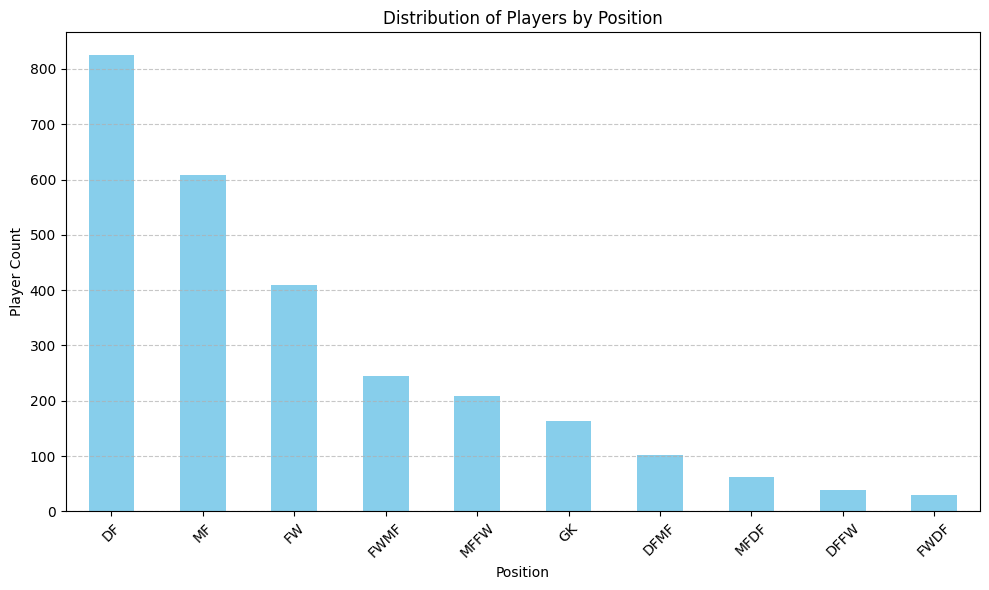

In [12]:
#Distribution of Positions
plt.figure(figsize = (10,6))
pos_count.plot(kind = 'bar', color = 'skyblue')
plt.title("Distribution of Players by Position")
plt.xlabel('Position')
plt.ylabel('Player Count')
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

## **Distribution of players by age**

In [13]:
player_ages = df["Age"]
young_players = [age for age in player_ages if age <25]
middle_aged_players = [age for age in player_ages if 25 < age <= 32]
older_players = [age for age in player_ages if age > 32]

In [14]:
age_group_counts = [len(young_players), len(middle_aged_players), len(older_players)]
age_groups = ['Young (<25)', 'Middle-aged (26-32)', 'Older (>32)']

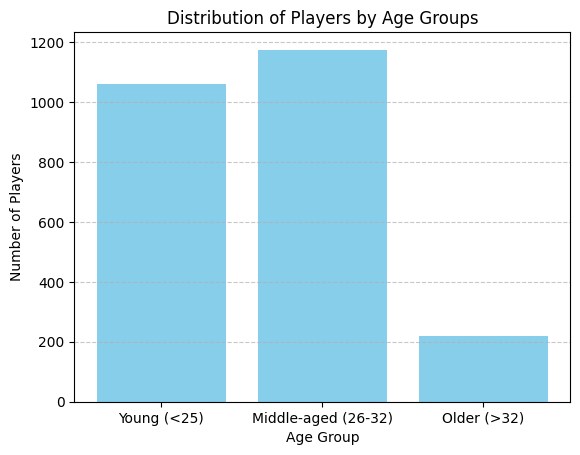

In [15]:
plt.bar(age_groups, age_group_counts, color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Number of Players')
plt.title('Distribution of Players by Age Groups')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

## **3. Goals vs Minutes Played**

In [32]:
goals = df["Goals"]
minutes_played = df["Min"]
positions = df['Pos']

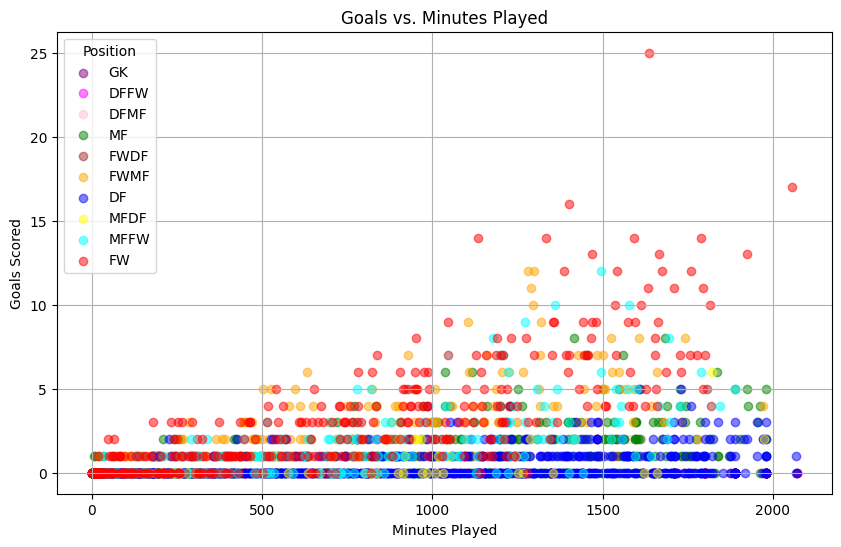

In [33]:
position_colors = {'DF': 'blue', 'MF': 'green', 'FW': 'red', 'FWMF': 'orange', 'GK': 'purple', 'MFFW': 'cyan', 'DFMF': 'pink', 'MFDF': 'yellow', 'DFFW': 'magenta', 'FWDF': 'brown'}

unique_positions = set(positions)

plt.figure(figsize=(10, 6))
for pos in unique_positions:
    indices = [i for i, p in enumerate(positions) if p == pos]
    plt.scatter([minutes_played[i] for i in indices], [goals[i] for i in indices], color=position_colors[pos], alpha=0.5, label=pos)
plt.legend(title='Position')
plt.title('Goals vs. Minutes Played')
plt.xlabel('Minutes Played')
plt.ylabel('Goals Scored')
plt.grid(True)
plt.show()

## **4. Pass Completion Percentage with Position**

In [34]:
pass_completion_data = df[['Pos', 'PasTotCmp%']]

<Figure size 1000x600 with 0 Axes>

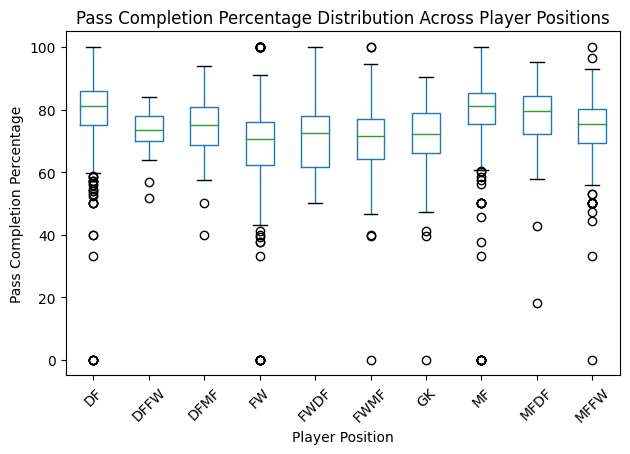

In [35]:
plt.figure(figsize=(10, 6))
pass_completion_data.boxplot(by='Pos', column='PasTotCmp%', grid=False)
plt.title('Pass Completion Percentage Distribution Across Player Positions')
plt.xlabel('Player Position')
plt.ylabel('Pass Completion Percentage')
plt.suptitle('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **5. Shot Creation Actions (SCA) vs Goals**

<ipython-input-41-88b0b350dfee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sca_goals_pos_data.dropna(inplace=True)


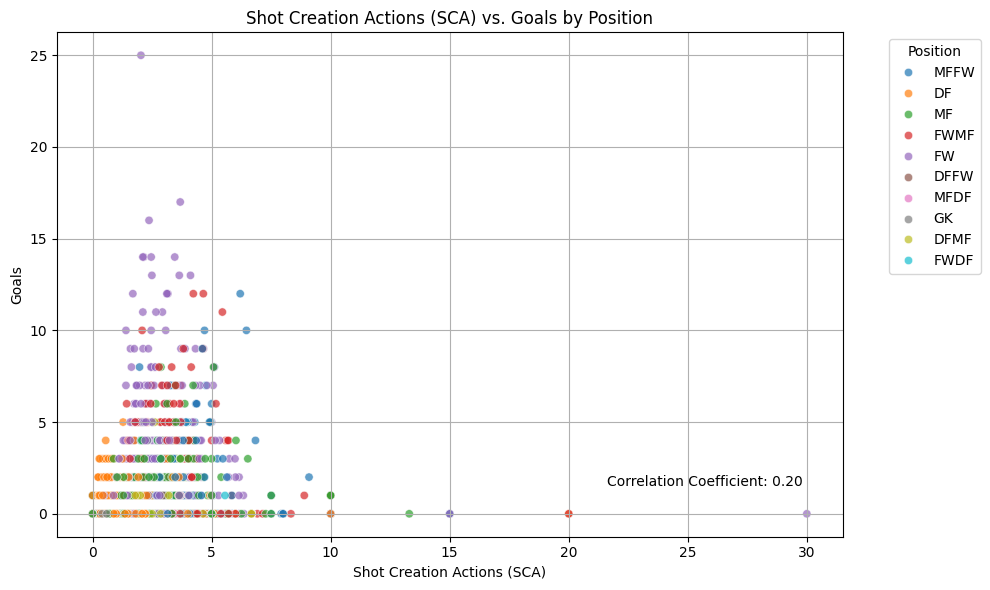

In [41]:
sca_goals_pos_data = df[['SCA', 'Goals', 'Pos']]

sca_goals_pos_data.dropna(inplace=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='SCA', y='Goals', hue='Pos', data=sca_goals_pos_data, alpha=0.7)

plt.xlabel('Shot Creation Actions (SCA)')
plt.ylabel('Goals')
plt.title('Shot Creation Actions (SCA) vs. Goals by Position')

correlation_coefficient = sca_goals_pos_data['SCA'].corr(sca_goals_pos_data['Goals'])
plt.text(0.7, 0.1, f'Correlation Coefficient: {correlation_coefficient:.2f}', transform=plt.gca().transAxes, fontsize=10)
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


## **6. Tackle and Position**

<ipython-input-42-782ea87f06c6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Pos', y='Tkl', data=tackles_data, palette='muted')


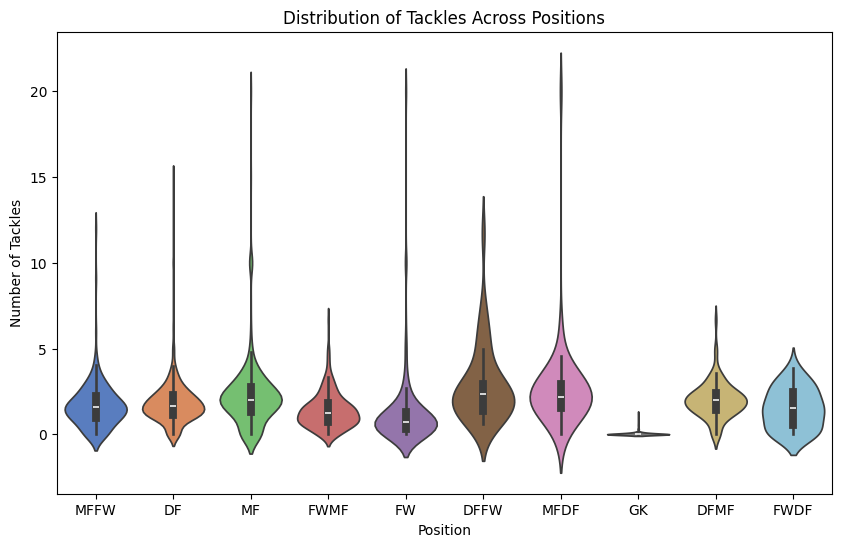

In [42]:
tackles_data = df[['Pos', 'Tkl']]

tackles_by_position = tackles_data.groupby('Pos')['Tkl'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Pos', y='Tkl', data=tackles_data, palette='muted')
plt.title('Distribution of Tackles Across Positions')
plt.xlabel('Position')
plt.ylabel('Number of Tackles')
plt.show()

## **7. Shot distance and Goals**

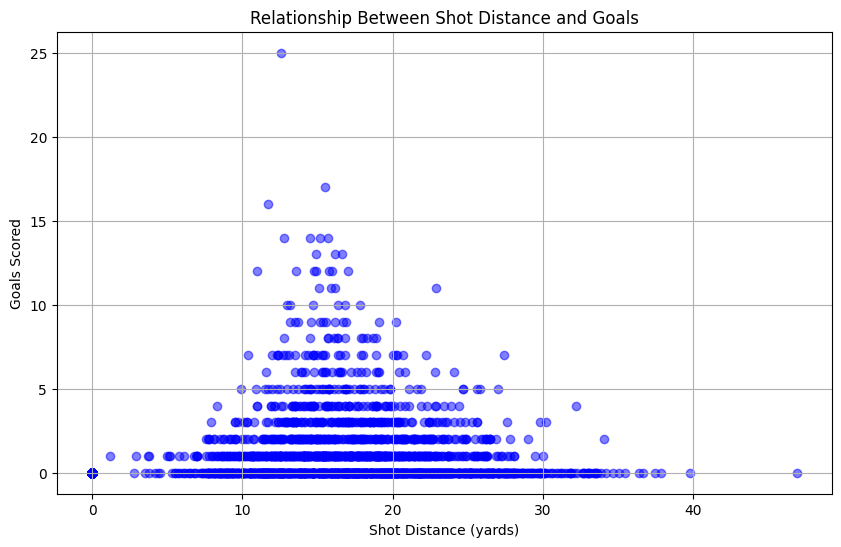

In [45]:
shot_distance = df['ShoDist']
goals = df['Goals']

plt.figure(figsize=(10, 6))
plt.scatter(shot_distance, goals, alpha=0.5, color='blue')

plt.title('Relationship Between Shot Distance and Goals')
plt.xlabel('Shot Distance (yards)')
plt.ylabel('Goals Scored')
plt.grid(True)
plt.show()

## **8. Goals and Shot distance of top 10 goal scorers**

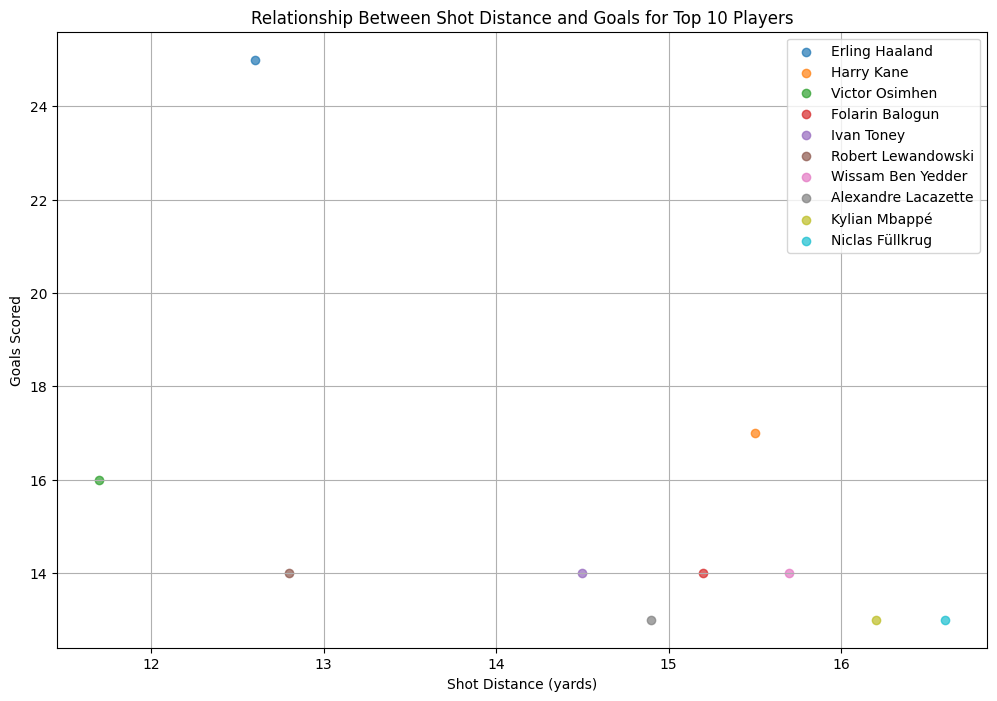

In [49]:
top_players = df.groupby('Player')['Goals'].sum().nlargest(10).index

top_players_data = df[df['Player'].isin(top_players)]

plt.figure(figsize=(12, 8))
for player in top_players:
    player_data = top_players_data[top_players_data['Player'] == player]
    plt.scatter(player_data['ShoDist'], player_data['Goals'], label=player, alpha=0.7)
plt.title('Relationship Between Shot Distance and Goals for Top 10 Players')
plt.xlabel('Shot Distance (yards)')
plt.ylabel('Goals Scored')
plt.legend()
plt.grid(True)
plt.show()

## **9. Total Goals Scored in each League**

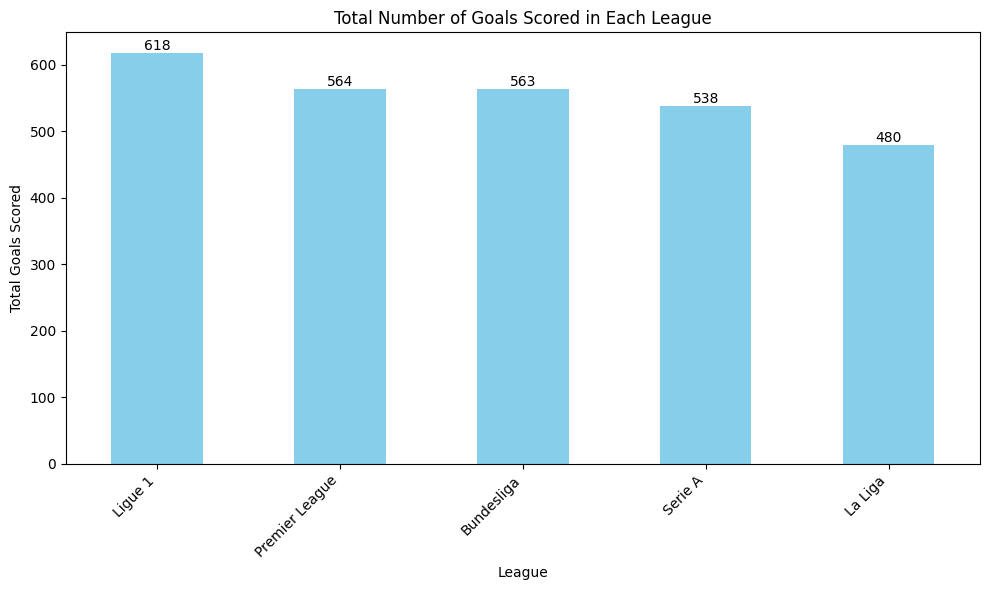

In [51]:
goals_by_league = df.groupby('Comp')['Goals'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = goals_by_league.plot(kind='bar', color='skyblue')
plt.title('Total Number of Goals Scored in Each League')
plt.xlabel('League')
plt.ylabel('Total Goals Scored')
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.tight_layout()
plt.show()

## **10. Player Efficiency Index**

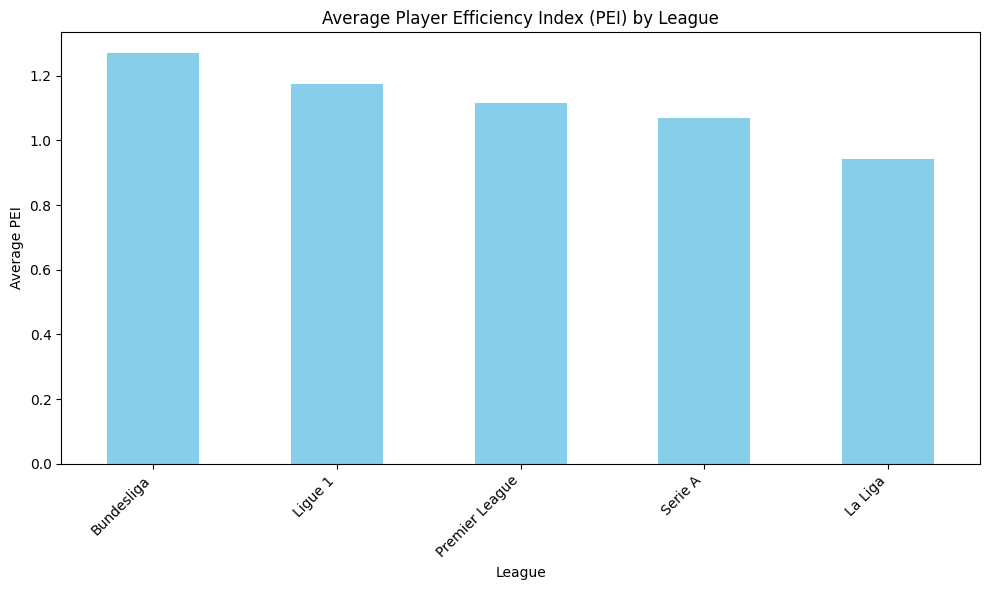

In [56]:
df['PEI'] = df['Goals'] + df['Assists']

avg_pei_by_league = df.groupby('Comp')['PEI'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_pei_by_league.plot(kind='bar', color='skyblue')
plt.title('Average Player Efficiency Index (PEI) by League')
plt.xlabel('League')
plt.ylabel('Average PEI')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **11. Aerial Duels Won of Top 10 Teams with Highest Goals Scored**

<ipython-input-58-ac6d1ed23c64>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_teams_aerial_duels = top_teams_data.groupby('Squad')['AerWon', 'AerLost'].sum()


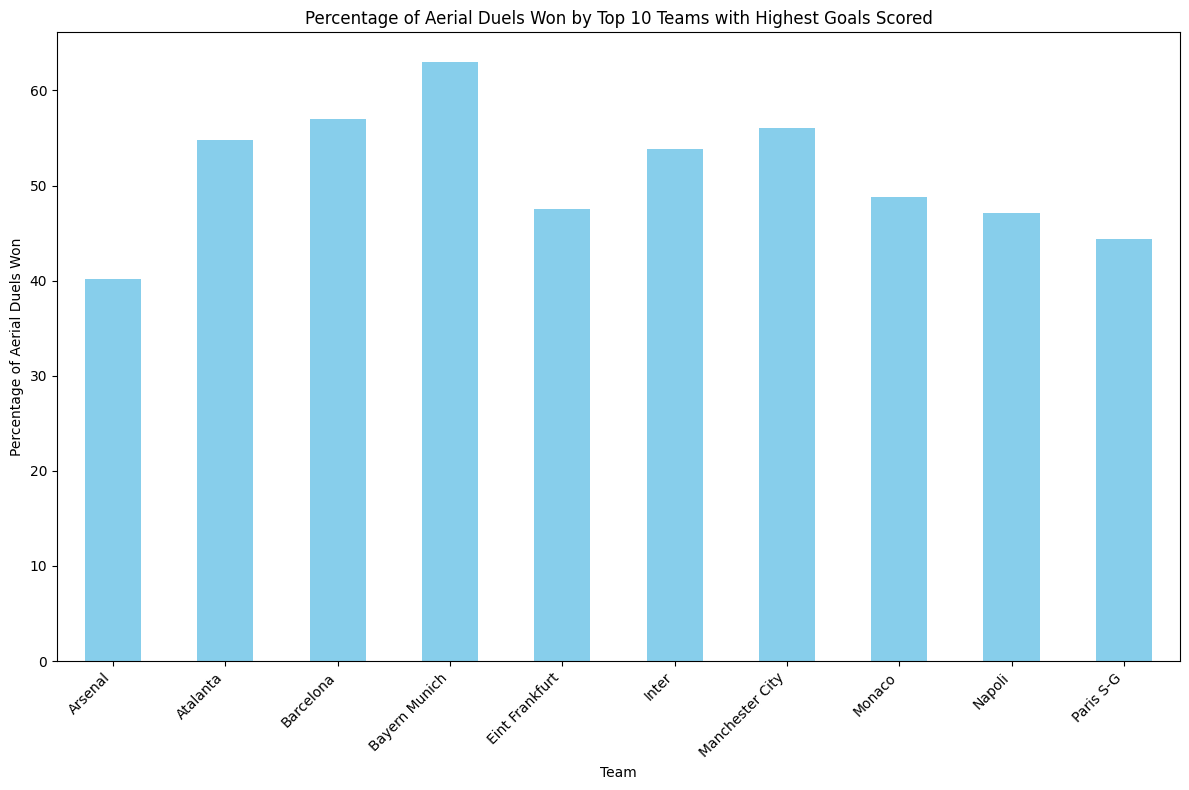

In [58]:
top_teams = df.groupby('Squad')['Goals'].sum().nlargest(10).index
top_teams_data = df[df['Squad'].isin(top_teams)]
top_teams_aerial_duels = top_teams_data.groupby('Squad')['AerWon', 'AerLost'].sum()
top_teams_aerial_duels['AerWon%'] = (top_teams_aerial_duels['AerWon'] / (top_teams_aerial_duels['AerWon'] + top_teams_aerial_duels['AerLost'])) * 100

plt.figure(figsize=(12, 8))
top_teams_aerial_duels['AerWon%'].plot(kind='bar', color='skyblue')
plt.title('Percentage of Aerial Duels Won by Top 10 Teams with Highest Goals Scored')
plt.xlabel('Team')
plt.ylabel('Percentage of Aerial Duels Won')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **12. Radar Chart**

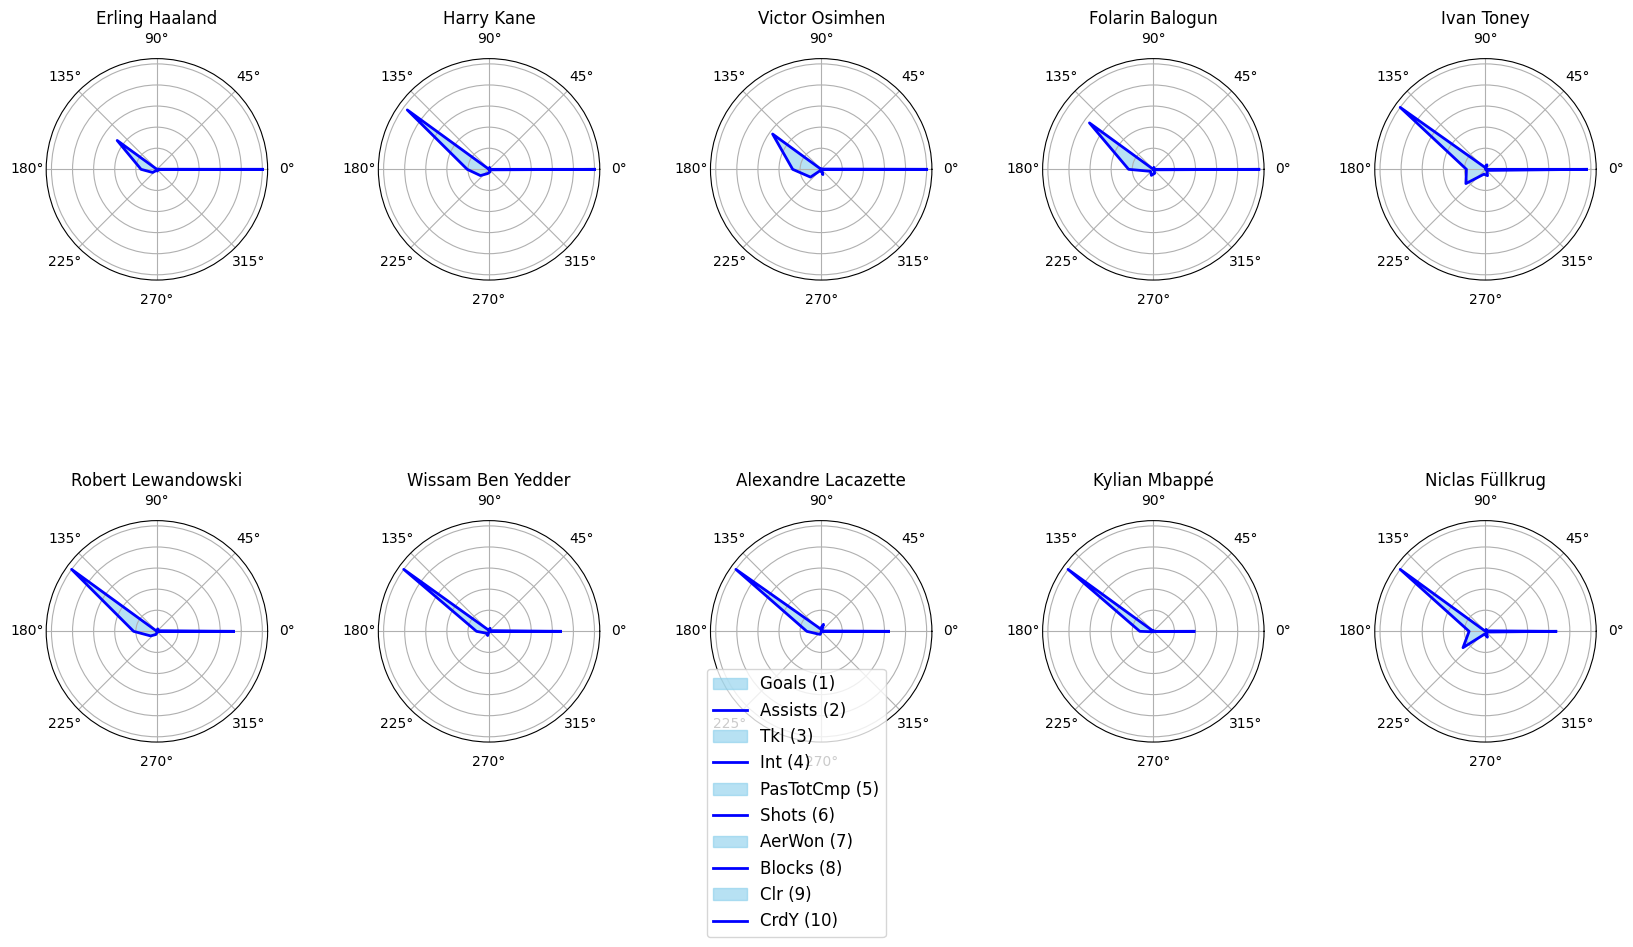

In [66]:
top_players = df.groupby('Player')['Goals'].sum().nlargest(10).index

categories = ['Goals', 'Assists', 'Tkl', 'Int', 'PasTotCmp', 'Shots', 'AerWon', 'Blocks', 'Clr', 'CrdY']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10), subplot_kw=dict(polar=True))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i, player in enumerate(top_players):
    ax = axes[i//5, i%5]
    player_data = df[df['Player'] == player]
    player_values = player_data[categories].values.flatten()
    player_values = (player_values - player_values.min()) / (player_values.max() - player_values.min())
    player_values = np.concatenate((player_values, [player_values[0]]))
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]
    ax.fill(angles, player_values, color='skyblue', alpha=0.6)
    ax.plot(angles, player_values, color='blue', linewidth=2)
    ax.set_yticklabels([])
    ax.set_title(player)
legend_labels = [f'{category} ({i+1})' for i, category in enumerate(categories)]
fig.legend(legend_labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), fontsize='large')
plt.show()